<a href="https://colab.research.google.com/github/jsten07/cms_routing/blob/main/firstCalculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Load libraries
from skimage.graph import route_through_array
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
import random
from datetime import datetime, timedelta
import math

In [4]:
#create some example values

# create example Grids wit 100*100
N = 100
timeGrid= [[random.random() for i in range(N)] for j in range(N)]
startpoint=(1,10)
endpoint= (90,99)
startTime="15:00"
endTime="18:00"

In [5]:
#create Route
route, weight = route_through_array(timeGrid, startpoint, endpoint, fully_connected=False, geometric=True)
route

[(1, 10),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (1, 23),
 (2, 23),
 (2, 24),
 (2, 25),
 (2, 26),
 (2, 27),
 (2, 28),
 (2, 29),
 (3, 29),
 (4, 29),
 (5, 29),
 (6, 29),
 (7, 29),
 (7, 30),
 (8, 30),
 (9, 30),
 (10, 30),
 (11, 30),
 (11, 31),
 (12, 31),
 (12, 32),
 (13, 32),
 (14, 32),
 (14, 33),
 (15, 33),
 (16, 33),
 (17, 33),
 (18, 33),
 (19, 33),
 (20, 33),
 (21, 33),
 (21, 34),
 (22, 34),
 (23, 34),
 (24, 34),
 (24, 35),
 (25, 35),
 (25, 36),
 (25, 37),
 (25, 38),
 (25, 39),
 (25, 40),
 (25, 41),
 (25, 42),
 (25, 43),
 (26, 43),
 (26, 44),
 (26, 45),
 (27, 45),
 (27, 46),
 (28, 46),
 (28, 47),
 (29, 47),
 (29, 48),
 (30, 48),
 (30, 49),
 (31, 49),
 (32, 49),
 (33, 49),
 (34, 49),
 (34, 50),
 (35, 50),
 (35, 51),
 (35, 52),
 (35, 53),
 (36, 53),
 (36, 54),
 (36, 55),
 (36, 56),
 (37, 56),
 (37, 57),
 (38, 57),
 (39, 57),
 (40, 57),
 (41, 57),
 (42, 57),
 (43, 57),
 (44, 57),
 (44, 58

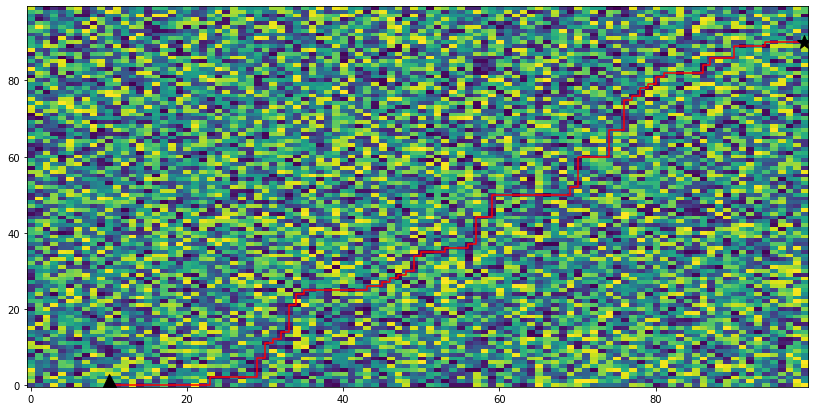

In [6]:
#plot route
routeDisplay=   np.stack(route, axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(routeDisplay[1],routeDisplay[0], 'r')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

In [7]:
def makeArrays(route):
    routeNew = []
    for x in route:
      routeNew.append(list(x))
    return routeNew

In [8]:
route = makeArrays(route)
route

[[1, 10],
 [0, 10],
 [0, 11],
 [0, 12],
 [0, 13],
 [0, 14],
 [0, 15],
 [0, 16],
 [0, 17],
 [0, 18],
 [0, 19],
 [0, 20],
 [0, 21],
 [0, 22],
 [0, 23],
 [1, 23],
 [2, 23],
 [2, 24],
 [2, 25],
 [2, 26],
 [2, 27],
 [2, 28],
 [2, 29],
 [3, 29],
 [4, 29],
 [5, 29],
 [6, 29],
 [7, 29],
 [7, 30],
 [8, 30],
 [9, 30],
 [10, 30],
 [11, 30],
 [11, 31],
 [12, 31],
 [12, 32],
 [13, 32],
 [14, 32],
 [14, 33],
 [15, 33],
 [16, 33],
 [17, 33],
 [18, 33],
 [19, 33],
 [20, 33],
 [21, 33],
 [21, 34],
 [22, 34],
 [23, 34],
 [24, 34],
 [24, 35],
 [25, 35],
 [25, 36],
 [25, 37],
 [25, 38],
 [25, 39],
 [25, 40],
 [25, 41],
 [25, 42],
 [25, 43],
 [26, 43],
 [26, 44],
 [26, 45],
 [27, 45],
 [27, 46],
 [28, 46],
 [28, 47],
 [29, 47],
 [29, 48],
 [30, 48],
 [30, 49],
 [31, 49],
 [32, 49],
 [33, 49],
 [34, 49],
 [34, 50],
 [35, 50],
 [35, 51],
 [35, 52],
 [35, 53],
 [36, 53],
 [36, 54],
 [36, 55],
 [36, 56],
 [37, 56],
 [37, 57],
 [38, 57],
 [39, 57],
 [40, 57],
 [41, 57],
 [42, 57],
 [43, 57],
 [44, 57],
 [44, 58

In [9]:
def calculateTime(route, startTime, endTime):
    sumTime = 0
    for x in route:
      sumTime = sumTime + timeGrid[x[0]][x[1]]
    startTime_object = datetime.strptime(startTime, "%H:%M" )
    endTime_object = datetime.strptime(endTime, "%H:%M" )
    minutes_added = timedelta(minutes  = sumTime)
    eta = startTime_object + minutes_added
    difference= endTime_object-eta
    total_seconds = difference.total_seconds()
    minutes = total_seconds/60
    return minutes
    
    
    

In [10]:
difference= calculateTime(route, startTime, endTime)
difference

134.7273381

In [11]:
def calculateBearing(route):
    for i in range(len(route)-1):
        if route[i][0]< route[i+1][0]:
            route[i].append("up")
        elif route[i][0] > route[i+1][0]:
            route[i].append("down")
        elif route[i][1] < route[i+1][1]:
            route[i].append("right")
        elif route[i][1] > route[i+1][1]:
            route[i].append("left")
        else:
             route[i].append("error")

In [12]:
calculateBearing(route)


In [13]:
route

[[1, 10, 'down'],
 [0, 10, 'right'],
 [0, 11, 'right'],
 [0, 12, 'right'],
 [0, 13, 'right'],
 [0, 14, 'right'],
 [0, 15, 'right'],
 [0, 16, 'right'],
 [0, 17, 'right'],
 [0, 18, 'right'],
 [0, 19, 'right'],
 [0, 20, 'right'],
 [0, 21, 'right'],
 [0, 22, 'right'],
 [0, 23, 'up'],
 [1, 23, 'up'],
 [2, 23, 'right'],
 [2, 24, 'right'],
 [2, 25, 'right'],
 [2, 26, 'right'],
 [2, 27, 'right'],
 [2, 28, 'right'],
 [2, 29, 'up'],
 [3, 29, 'up'],
 [4, 29, 'up'],
 [5, 29, 'up'],
 [6, 29, 'up'],
 [7, 29, 'right'],
 [7, 30, 'up'],
 [8, 30, 'up'],
 [9, 30, 'up'],
 [10, 30, 'up'],
 [11, 30, 'right'],
 [11, 31, 'up'],
 [12, 31, 'right'],
 [12, 32, 'up'],
 [13, 32, 'up'],
 [14, 32, 'right'],
 [14, 33, 'up'],
 [15, 33, 'up'],
 [16, 33, 'up'],
 [17, 33, 'up'],
 [18, 33, 'up'],
 [19, 33, 'up'],
 [20, 33, 'up'],
 [21, 33, 'right'],
 [21, 34, 'up'],
 [22, 34, 'up'],
 [23, 34, 'up'],
 [24, 34, 'right'],
 [24, 35, 'up'],
 [25, 35, 'right'],
 [25, 36, 'right'],
 [25, 37, 'right'],
 [25, 38, 'right'],
 [25, 3

In [39]:
#not working
def manipulate(route):
  randomNumber = random.random()*len(route)
  startIndex= math.floor(randomNumber)
  startpoint = route[startIndex]
  endIndex= math.floor(startIndex + (random.random() * (len(route)-startIndex)))
  endpoint= route[endIndex]
  newGrid= [[random.random() for i in range(N)] for j in range(N)]
  print(newGrid, startpoint[0:1], endpoint)
  manipulateRoute, weight = route_through_array(newGrid, startpoint[0:2], endpoint[0:2], fully_connected=False, geometric=True)
  manipulatedRoute = route[0:(startIndex-1)]
  manipulatedRoute.append(manipulateRoute)
  manipulatedRoute.append(route[(endIndex+1):route(len)])
  return manipulatedRoute




In [40]:
#not working
manipulatedRoute = manipulate(route)

[[0.19230395093654018, 0.5860009080662171, 0.4118118968207516, 0.7843923589165478, 0.3255087143259131, 0.6831000844893823, 0.5623186722220541, 0.9032447797102826, 0.40217001780223216, 0.4121779830696708, 0.5148960848351303, 0.9019327497650627, 0.9122561091851838, 0.0454436100096971, 0.5274655800174968, 0.7741603225926561, 0.0050742129577289186, 0.18143076261920532, 0.6598926797376745, 0.3927343601229146, 0.8498409476386171, 0.9578277200472519, 0.2985184997212478, 0.0778293402748742, 0.3948467195097466, 0.6840584289976795, 0.3601153444062972, 0.5280673689632847, 0.28786620414228214, 0.7185683133587398, 0.41667547899012225, 0.6360579893178469, 0.9666207694449692, 0.15805421905557304, 0.9731846696571245, 0.18425482876874, 0.47433462910605984, 0.795281647420268, 0.010186282020149595, 0.736313884905918, 0.005738124097137365, 0.6090060318722307, 0.3692545440055044, 0.379458149964954, 0.6452209745963314, 0.9802463250930087, 0.5289647127112687, 0.8643850915643968, 0.5601748426163132, 0.7666860

TypeError: ignored